In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [48]:
path = '/Users/leonardo/Desktop/Thesis/Data/GridWorld'
occupancy_data = []
for i in range (2, 5):
    with open(f'{path}/GridWorldContResults_{i}.json', 'r') as f:
        occupancy_data.append(json.load(f))

In [49]:
x_coords = []
y_coords = []

for outer_list in occupancy_data:
    for inner_list in outer_list:
        for key, entry in inner_list.items():
            if 'pos_x' in entry and 'pos_y' in entry:
                x_coords.append(entry['pos_x'])
                y_coords.append(entry['pos_y'])

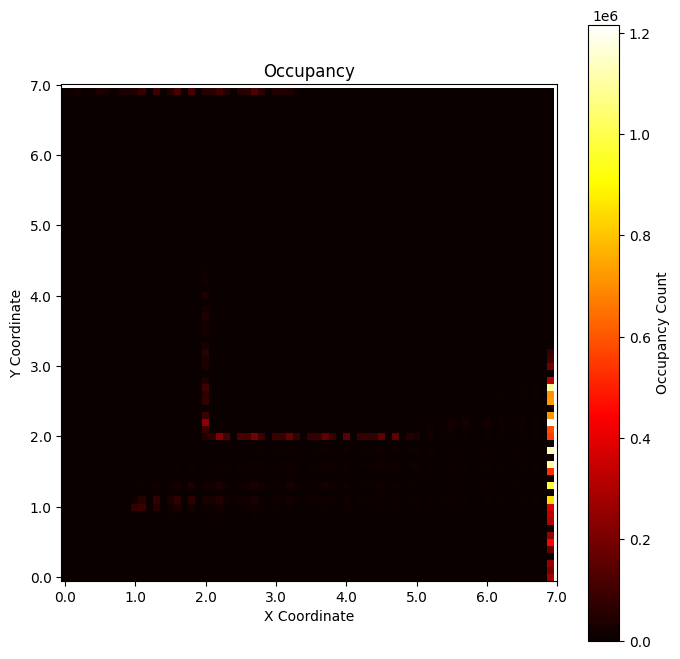

In [50]:
# Define grid parameters
grid_size = 7  # 7x7 grid
step = 0.1

# Create 2D histogram with bins based on the step and grid size
x_bins = np.arange(0, grid_size + step, step)
y_bins = np.arange(0, grid_size + step, step)

# Calculate occupancy counts for each bin
occupancy_counts, _, _ = np.histogram2d(x_coords, y_coords, bins=[x_bins, y_bins])

# Plotting the occupancy data
plt.figure(figsize=(8, 8))
plt.imshow(occupancy_counts.T, origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar(label='Occupancy Count')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Occupancy')
plt.xticks(np.arange(0, len(x_bins), int(1 / step)), np.round(np.arange(0, grid_size + step, 1), 1))
plt.yticks(np.arange(0, len(y_bins), int(1 / step)), np.round(np.arange(0, grid_size + step, 1), 1))
plt.grid(False)
plt.show()
